## Matplotlib三层结构
### 一、容器层
1.画板层Canvas

2.画布层Figure

3.绘图区/坐标系Axes
### 二、辅助显示层
1.修改x, y轴刻度plt.x/yticks()

2.添加描述信息plt.x/ylabel(); plt.title()

3.添加⽹格plt.grid()

4.显示图例plt.legend()
### 三、图像层(可以设置图像颜色、风格、标签等)
1.折线图plt.plot()

2.散点图plt.scatter()

3.柱状图plt.bar()

4.直方图plt.hist()

5.饼图plt.pie()

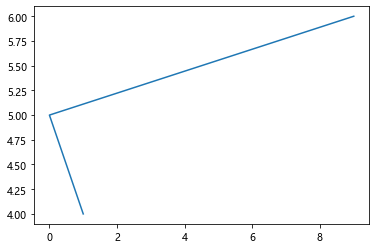

In [1]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot([1, 0, 9], [4, 5, 6])
plt.show()

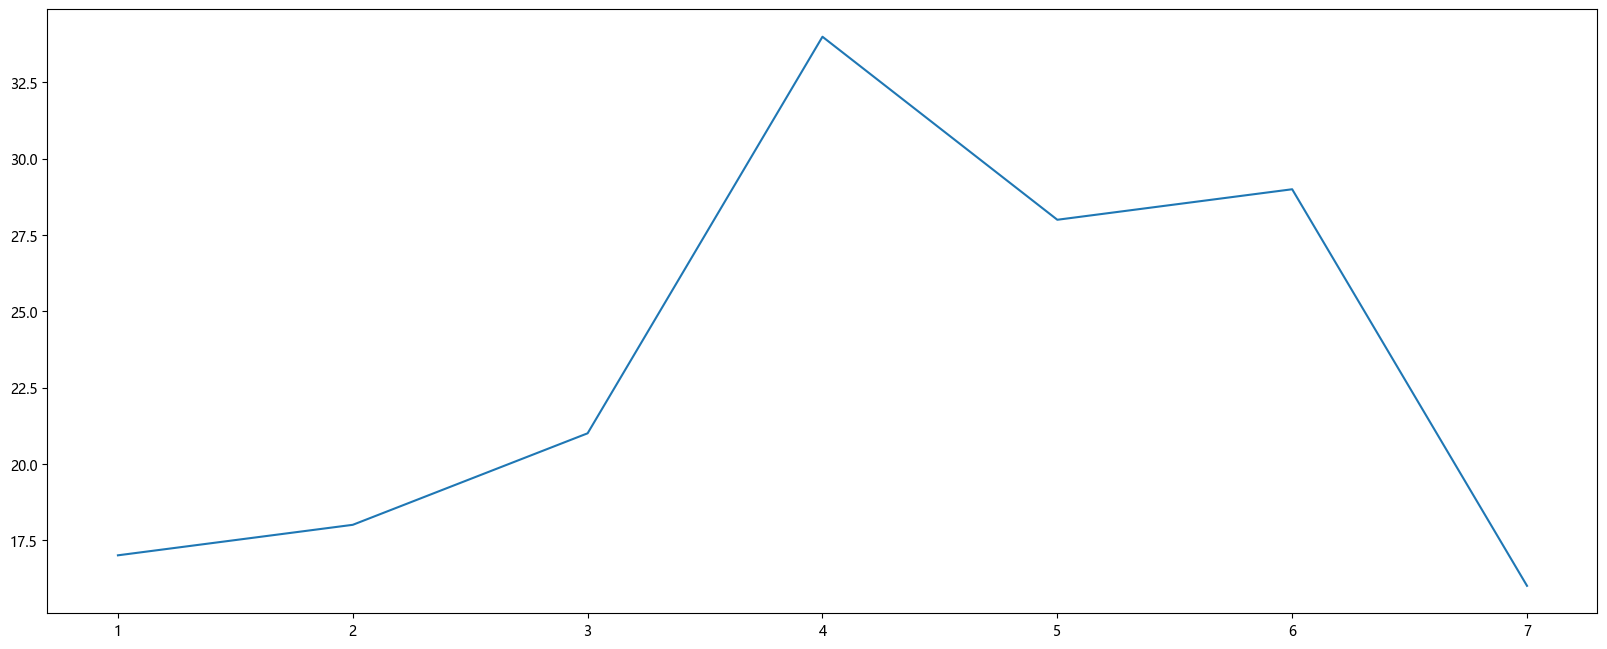

In [2]:
# 1.创建画布
# figsize 指定图片长宽 dpi 图像清晰度
plt.figure(figsize=(20, 8), dpi=100)
# 2.绘制图像
plt.plot([1, 2, 3, 4, 5, 6, 7], [17, 18, 21, 34, 28, 29, 16])
# 保存图片
# plt.savefig("test.png")
# 3.显示图像
# 注意: plt.show()会释放figure资源，如果在显示图像之后保存图片将只能保存空图片。
plt.show()

### 总结
Canvas(画板)位于最底层，用户一般接触不到

Figure (画布)建立在Canvs之上

Axes(绘图区)建立在Figure之上

坐标轴(axis)、图例(legend)等辅助显示层以及图像层都是建立在Axes之上

## 完善原始折线图（辅助显示层）

### 解决matplotlib中文乱码问题
进入Python安装目录下的Lib\site-packages\matplotlib\mpl-data目录，打开matplotlibrc文件，删除`font.sans-serif`前的`#`，并在font.sans-serif后添加微软雅黑字体（Microsoft YaHei），代码如下：
```
font.sans-serif: Microsoft YaHei, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
```

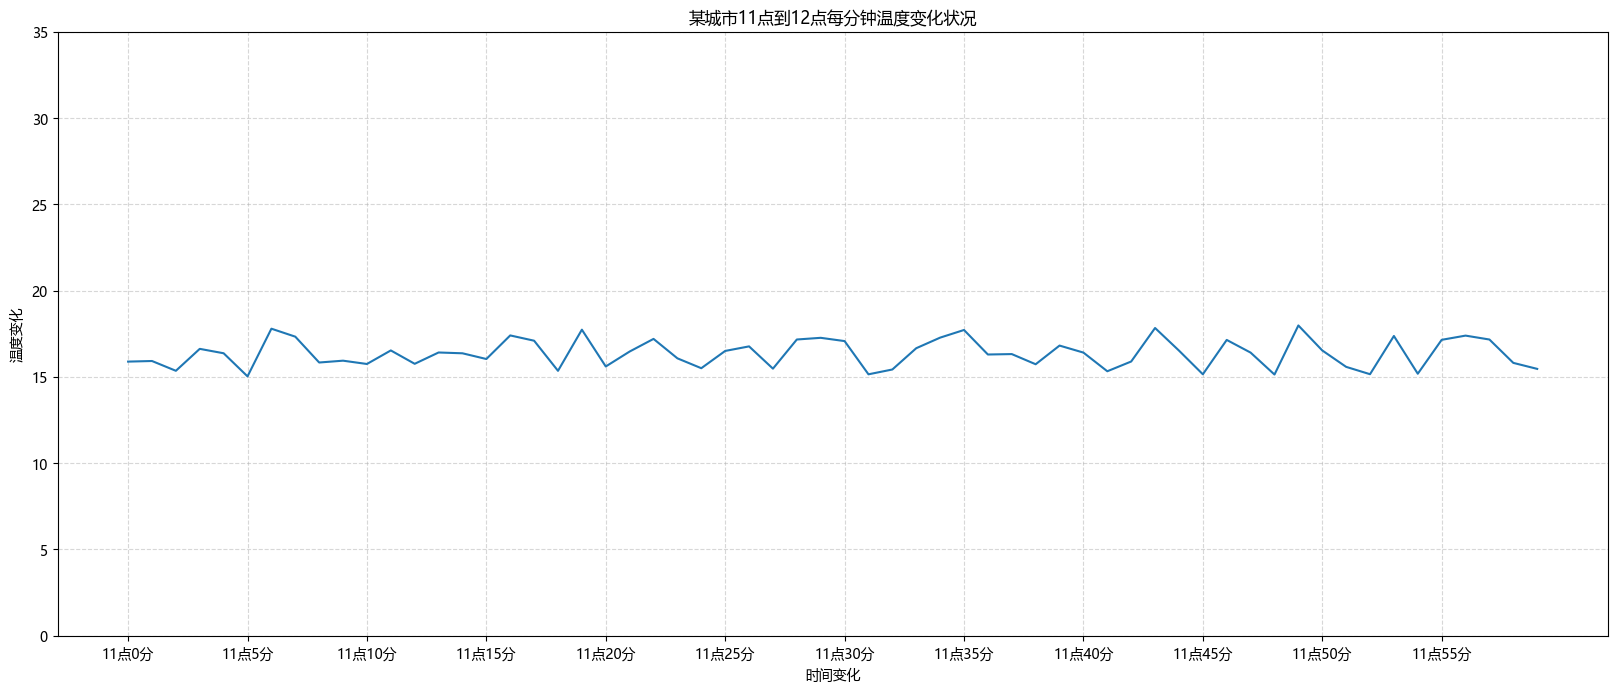

In [3]:
# 需求︰画出某城市11点到12点1小时内每分钟的温度变化折线图，温度范围在15度~18度
# 1.准备数据x,y
import random
x = range(60)
y_shanghai = [random.uniform(15, 18) for i in x]
# 2.创建画布
plt.figure(figsize=(20, 8), dpi=100)
# 3.绘制图像
plt.plot(x, y_shanghai)
# 添加自定义刻度
# plt.xticks(x,**kwargs) x:要显示的刻度值    plt.yticks(y,**kwargs)
# 准备x的刻度说明
x_lable = ["11点{}分".format(i) for i in x]
plt.xticks(x[::5], x_lable[::5])
plt.yticks(range(0, 40, 5))
# 添加网格
plt.grid(linestyle="--", alpha=0.5)
# 添加描述
plt.xlabel("时间变化")
plt.ylabel("温度变化")
plt.title("某城市11点到12点每分钟温度变化状况")
# 4.显示图像
# 注意: plt.show()会释放figure资源，如果在显示图像之后保存图片将只能保存空图片。
plt.show()

##  完善折线图（图像层）

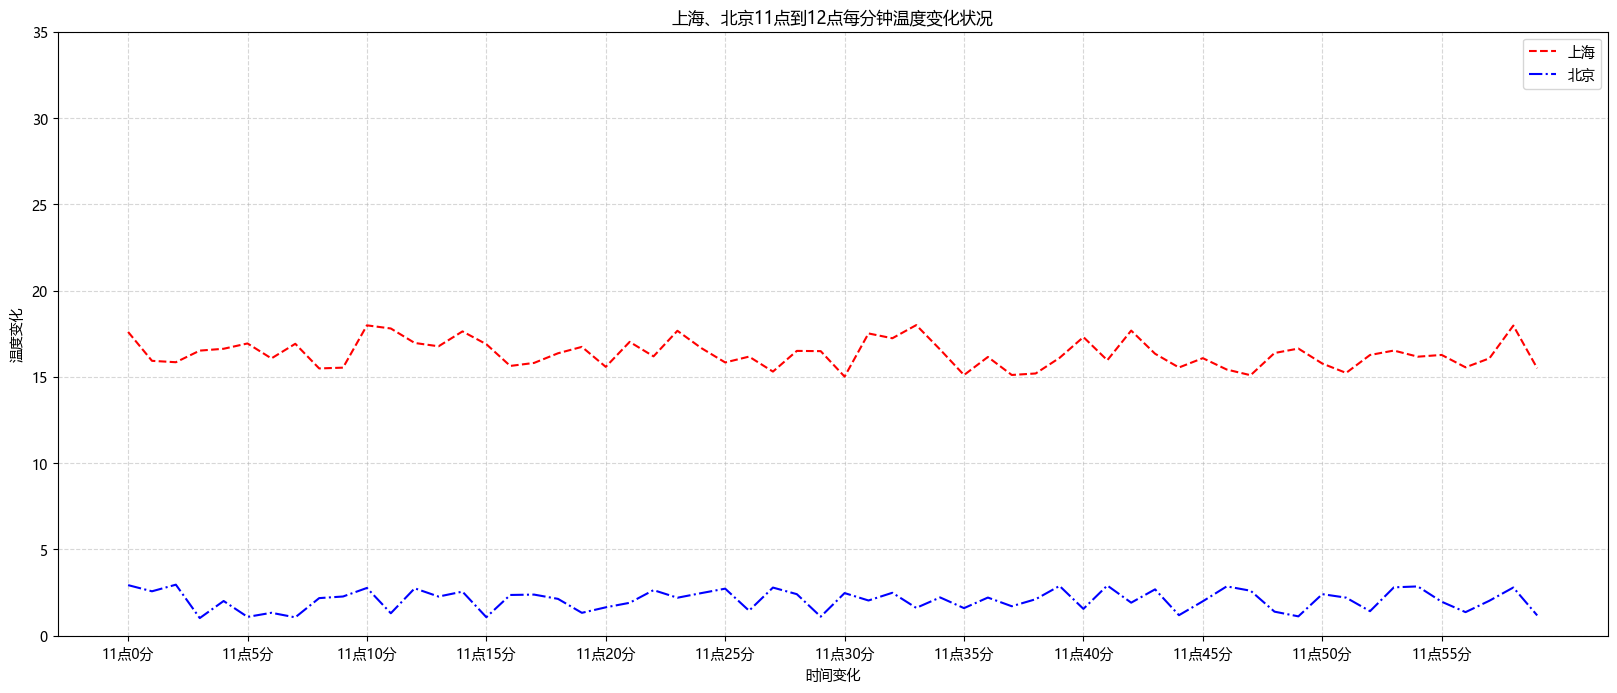

In [4]:
# 完善折线图（图像层）
# 需求：再添加一个城市的温度变化
# 收集北京当天温度变化情况，温度1度到3度
# 1.准备数据x,y
x = range(60)
y_shanghai = [random.uniform(15, 18) for i in x]
y_beijing = [random.uniform(1, 3) for i in x]
# 2.创建画布
plt.figure(figsize=(20, 8), dpi=100)
# 3.绘制图像
plt.plot(x, y_shanghai, color="r", linestyle="--", label="上海")
plt.plot(x, y_beijing, color="b", linestyle="-.", label="北京")
# 显示图例
plt.legend()

# 添加自定义刻度
# plt.xticks(x,**kwargs) x:要显示的刻度值    plt.yticks(y,**kwargs)
# 准备x的刻度说明
x_lable = ["11点{}分".format(i) for i in x]
plt.xticks(x[::5], x_lable[::5])
plt.yticks(range(0, 40, 5))
# 添加网格
plt.grid(linestyle="--", alpha=0.5)
# 添加描述
plt.xlabel("时间变化")
plt.ylabel("温度变化")
plt.title("上海、北京11点到12点每分钟温度变化状况")
# 4.显示图像
# 注意: plt.show()会释放figure资源，如果在显示图像之后保存图片将只能保存空图片。
plt.show()

## 多个坐标系显示-plt.subplots(面向对象的画图方法)

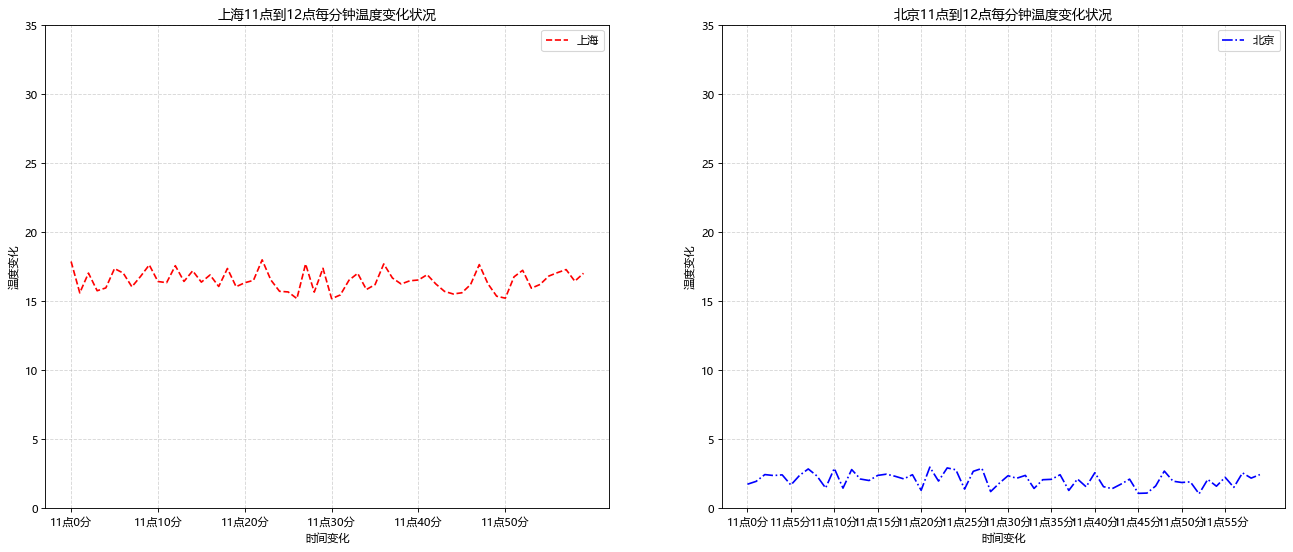

In [5]:
# 多个坐标系显示-plt.subplots(面向对象的画图方法)
# 需求：将北京和上海分开显示
# 1.准备数据x,y
x = range(60)
y_shanghai = [random.uniform(15, 18) for i in x]
y_beijing = [random.uniform(1, 3) for i in x]
# 2.创建画布
# plt.figure(figsize=(20, 8), dpi=100)
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=80)
# 3.绘制图像
axes[0].plot(x, y_shanghai, color="r", linestyle="--", label="上海")
axes[1].plot(x, y_beijing, color="b", linestyle="-.", label="北京")
# 显示图例
axes[0].legend()
axes[1].legend()

# 添加自定义刻度
# plt.xticks(x,**kwargs) x:要显示的刻度值    plt.yticks(y,**kwargs)
# 准备x的刻度说明
x_lable = ["11点{}分".format(i) for i in x]
axes[0].set_xticks(x[::10])
axes[0].set_xticklabels(x_lable[::10])
axes[0].set_yticks(range(0, 40, 5))
axes[1].set_xticks(x[::5])
axes[1].set_xticklabels(x_lable[::5])
axes[1].set_yticks(range(0, 40, 5))
# 添加网格
axes[0].grid(linestyle="--", alpha=0.5)
axes[1].grid(linestyle="--", alpha=0.5)
# 添加描述
axes[0].set_xlabel("时间变化")
axes[0].set_ylabel("温度变化")
axes[0].set_title("上海11点到12点每分钟温度变化状况")
axes[1].set_xlabel("时间变化")
axes[1].set_ylabel("温度变化")
axes[1].set_title("北京11点到12点每分钟温度变化状况")
# 4.显示图像
# 注意: plt.show()会释放figure资源，如果在显示图像之后保存图片将只能保存空图片。
plt.show()

## 绘制数学函数图像

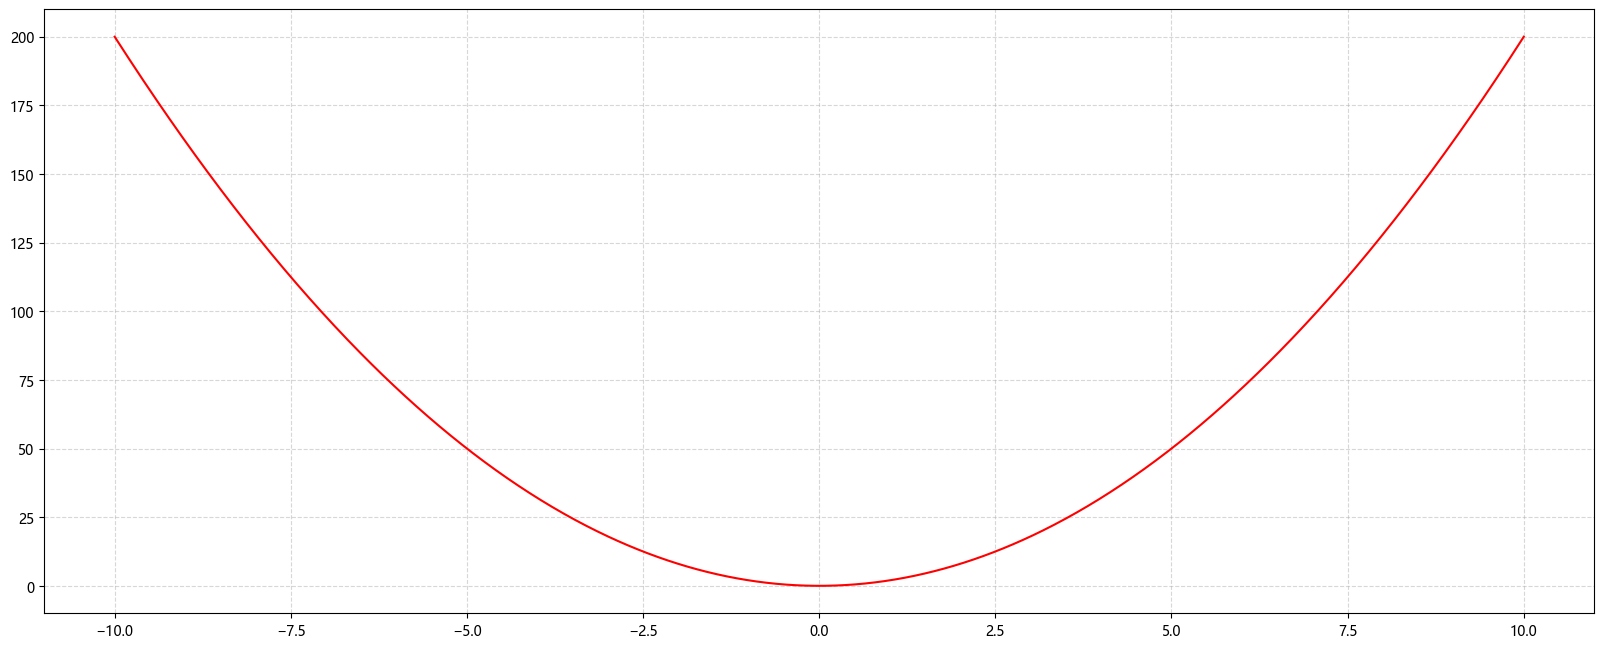

In [6]:
import numpy as np

# 1.准备x，y数据
x = np.linspace(-10, 10, 1000)
y = 2 * x * x
# 2.创建画布
plt.figure(figsize=(20, 8), dpi=100)
# 3.绘制图像
plt.plot(x, y, color="r")
# 添加网格
plt.grid(linestyle="--", alpha=0.5)
# 4.显示图像
plt.show()